In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Load data
df = pd.read_csv("data.csv")

# Encode target values (Malignant = 1, Benign = 0)
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})
X = df.drop(columns=['id', 'Unnamed: 32', 'diagnosis'])
y = df['diagnosis']

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


<ipython-input-1-5c56efd5b487>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})


In [2]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize RandomForest with Gini impurity and cross-validation
rf = RandomForestClassifier(n_estimators=25, criterion='gini', max_depth=10, random_state=42)

# Cross-validation scores for accuracy
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Train the model
rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}, F1 Score: {f1}, Precision: {precision}, Recall: {recall}")


Cross-Validation Accuracy Scores: [0.95       0.95       0.975      0.93670886 0.93670886]
Mean CV Accuracy: 0.9496835443037975
Accuracy: 0.9707602339181286, F1 Score: 0.959349593495935, Precision: 0.9833333333333333, Recall: 0.9365079365079365


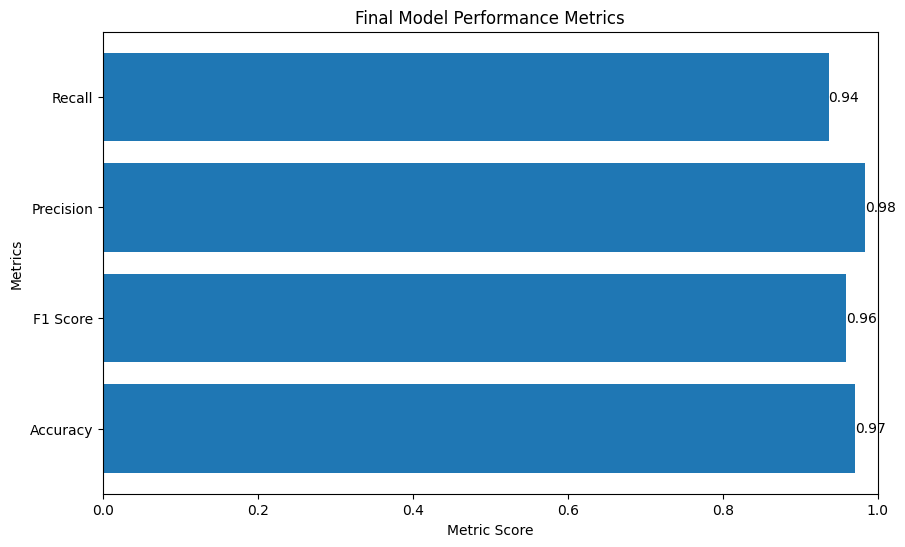

In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Metrics and their scores
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
scores = [accuracy, f1, precision, recall]

# Create a horizontal bar plot with a single color
plt.figure(figsize=(10, 6))
plt.barh(metrics, scores, color='#1f77b4')  # Using a single blue color
for index, value in enumerate(scores):
    plt.text(value, index, f"{value:.2f}", va='center', ha='left')  # Display scores on bars

# Set plot title and labels
plt.xlim(0, 1)  # Ensure the x-axis is from 0 to 1 for clarity
plt.title("Final Model Performance Metrics")
plt.xlabel("Metric Score")
plt.ylabel("Metrics")

# Show plot
plt.show()




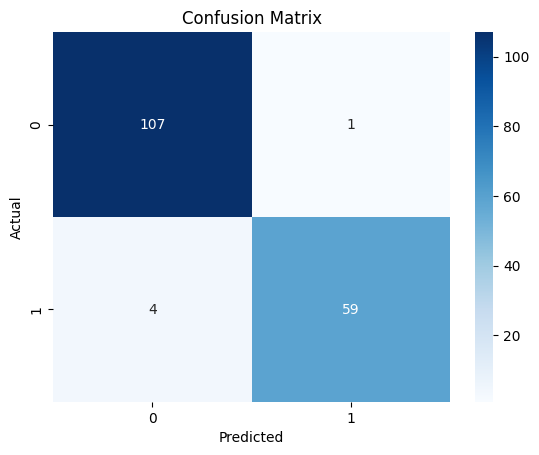

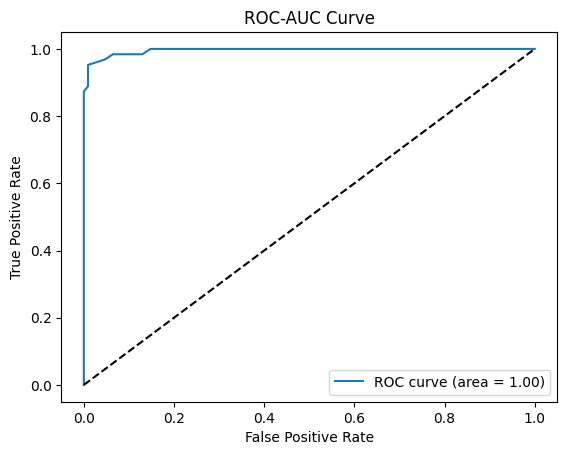

In [4]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Curve
y_pred_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


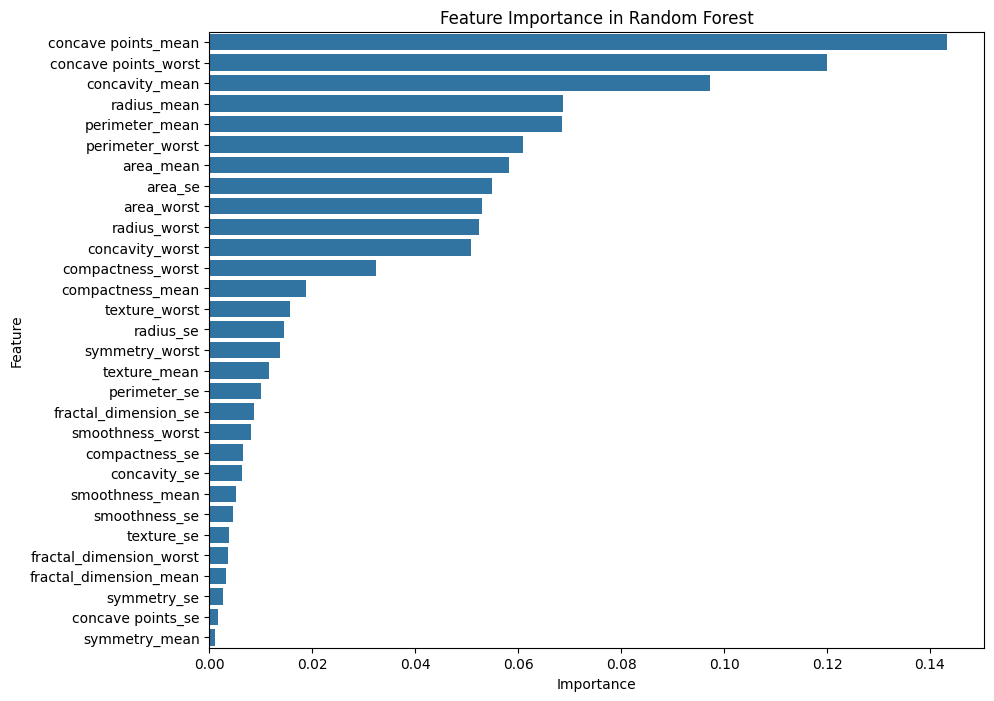

In [5]:
# Feature Importance Plot
feature_importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()


Shape of shap_values: (171, 30, 2)
Shape of X_test: (171, 30)


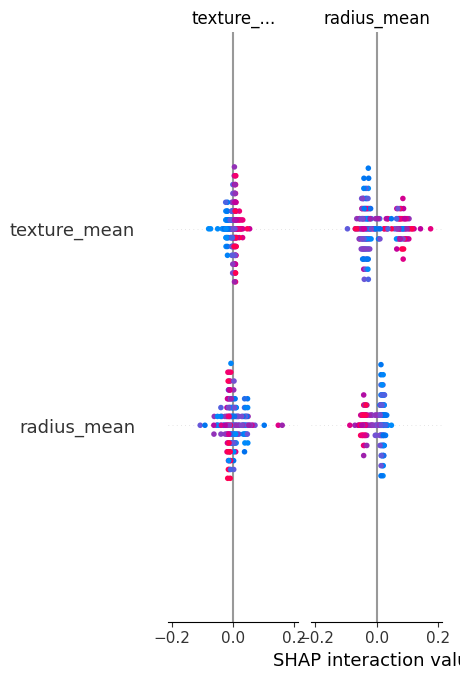

In [6]:
# Calculate SHAP values without specifying class index for binary classification
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Display shapes for debugging
print("Shape of shap_values:", np.array(shap_values).shape)
print("Shape of X_test:", X_test.shape)

# Use shap_values directly without specifying index
shap.summary_plot(shap_values, X_test, feature_names=features)


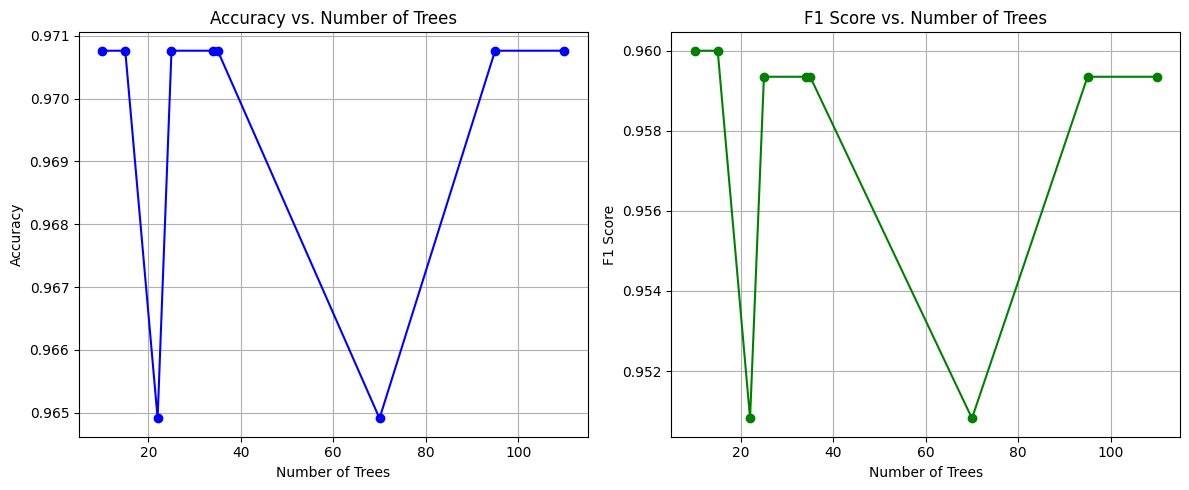

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Range of tree numbers to test
num_trees = [10, 15, 22, 25, 34, 35, 70, 95, 110]

# Lists to store accuracy and F1 scores for each number of trees
accuracy_scores = []
f1_scores = []

# Loop over different numbers of trees
for n in num_trees:
    # Initialize the RandomForestClassifier with n trees
    rf = RandomForestClassifier(n_estimators=n, max_depth=10, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions and calculate accuracy and F1 score
    y_pred = rf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot Accuracy vs. Number of Trees
plt.figure(figsize=(12, 5))

# Subplot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(num_trees, accuracy_scores, marker='o', color='blue')
plt.title("Accuracy vs. Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.grid(True)

# Subplot for F1 Score
plt.subplot(1, 2, 2)
plt.plot(num_trees, f1_scores, marker='o', color='green')
plt.title("F1 Score vs. Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("F1 Score")
plt.grid(True)

plt.tight_layout()
plt.show()
